In [1]:
import pandas as pd
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [2]:
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

In [3]:
print(sklearn.__version__)

1.2.2


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df['TotalCharges'].fillna(value=df['TotalCharges'].mean(), inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
print(df['gender'].unique())
print(df['SeniorCitizen'].unique())
print(df['Partner'].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']


<Axes: xlabel='gender', ylabel='count'>

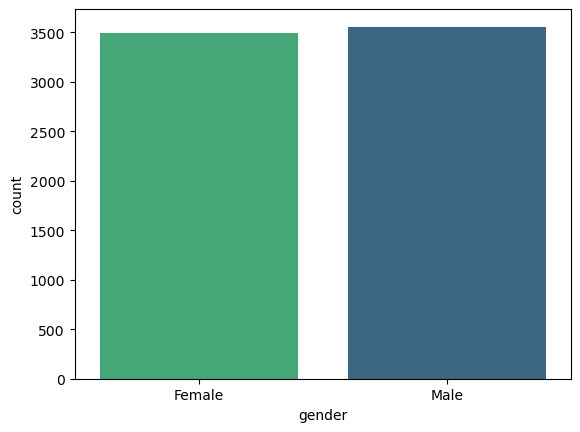

In [10]:
sns.countplot(df,x='gender',palette='viridis_r')

<Axes: xlabel='Partner', ylabel='count'>

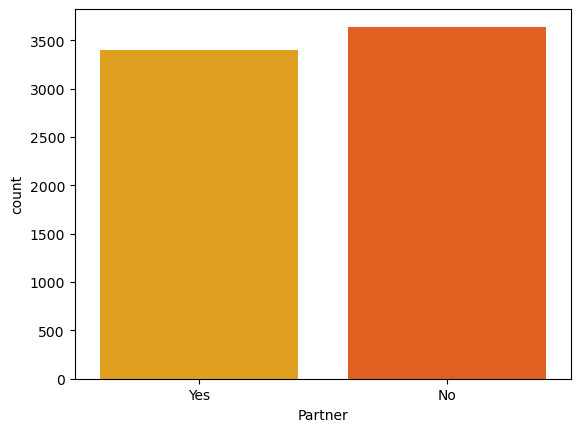

In [11]:
sns.countplot(df,x='Partner',palette='autumn_r')

<Axes: xlabel='InternetService', ylabel='count'>

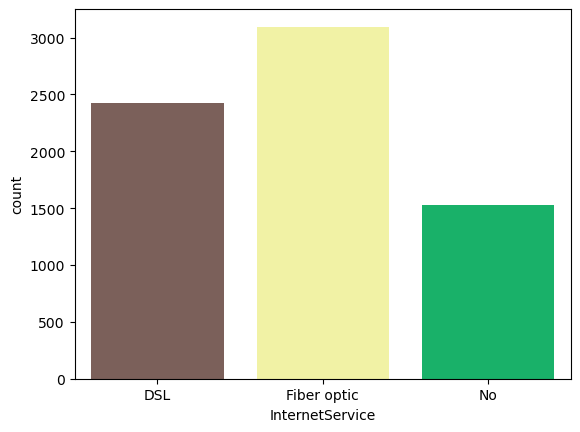

In [12]:
sns.countplot(df,x='InternetService',palette='terrain_r')

<Axes: xlabel='OnlineBackup', ylabel='count'>

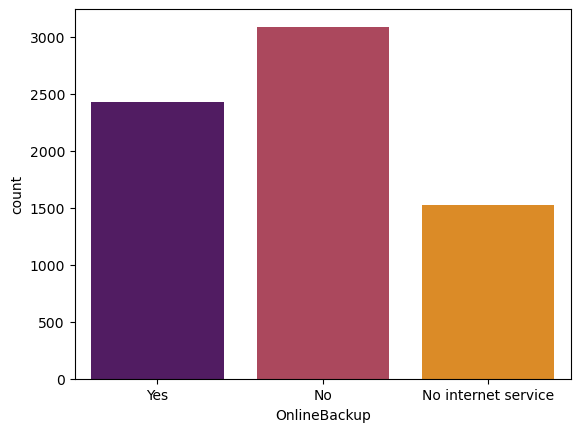

In [13]:
sns.countplot(df,x='OnlineBackup',palette='inferno')

<Axes: xlabel='InternetService', ylabel='MonthlyCharges'>

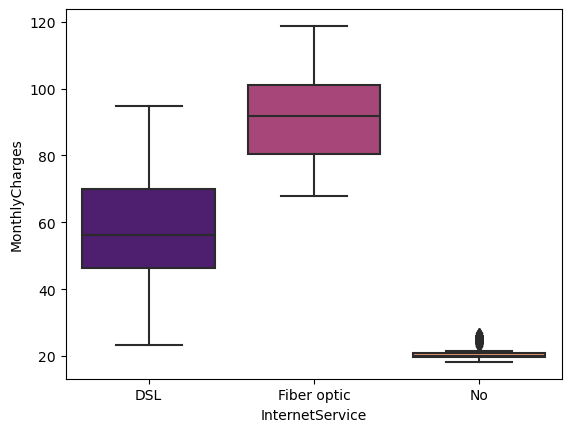

In [14]:
sns.boxplot(x = 'InternetService', y = 'MonthlyCharges', data = df, palette = 'magma')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

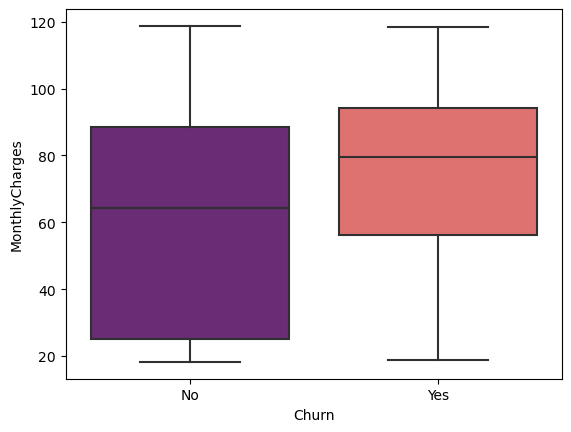

In [15]:
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = df, palette = 'magma')

<Axes: xlabel='SeniorCitizen', ylabel='TotalCharges'>

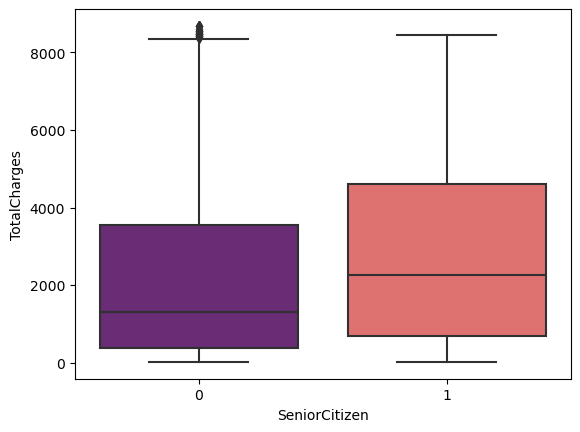

In [16]:
sns.boxplot(x = 'SeniorCitizen', y = 'TotalCharges', data = df, palette = 'magma')

<Axes: xlabel='SeniorCitizen', ylabel='TotalCharges'>

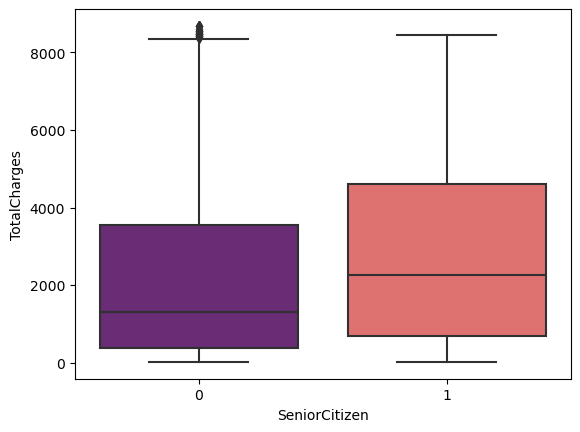

In [17]:
sns.boxplot(x = 'SeniorCitizen', y = 'TotalCharges', data = df, palette = 'magma')

In [18]:
df_categorical = df.select_dtypes(include = "object")
df_numerical = df.select_dtypes(exclude = "object")

In [19]:
df_categorical.drop(['customerID'], axis = 1, inplace = True)

In [20]:
df['gender']=df['gender'].astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [22]:
df_dummy_encoding = pd.get_dummies(df_categorical).astype(int)

In [23]:
df_dummy_encoding

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,0,0,1,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,1,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,1,0
7039,1,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
7040,1,0,0,1,0,1,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
7041,0,1,0,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1


In [24]:
df_final = pd.concat([df_dummy_encoding, df_numerical], axis = 1)

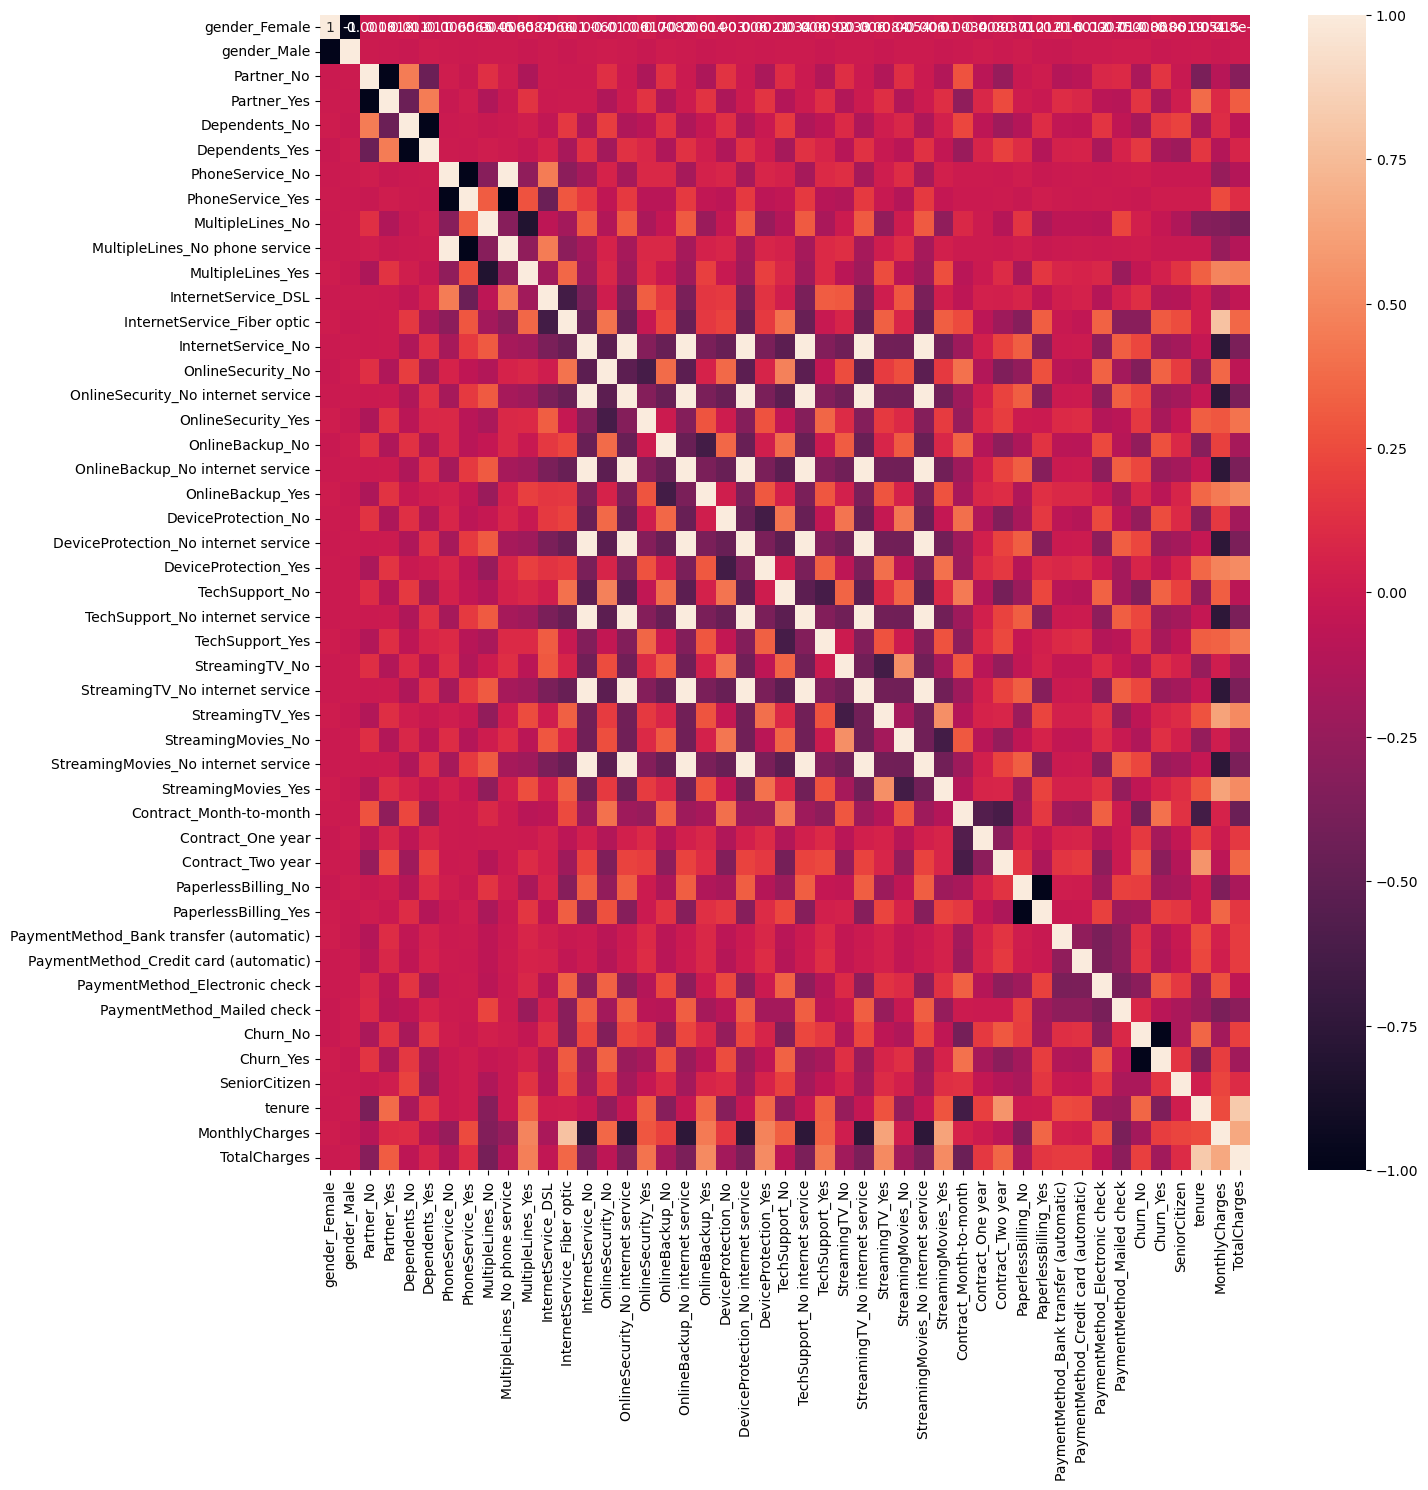

In [25]:
plt.figure(figsize = (15, 15))
sns.heatmap(df_final.corr(), annot = True)
#plt.savefig('Plots/Heatmap Correlation.png')
plt.show()

In [26]:
X = df_final.drop(['Churn_Yes'], axis = 1)
y = df_final['Churn_Yes']

In [27]:
X_train, X_cv, y_train, y_cv  = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_cv_transformed = scaler.transform(X_cv)

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
pca.fit(X_train_transformed)
X_train_reduced = pca.transform(X_train_transformed)
X_cv_reduced = pca.transform(X_cv_transformed)

In [30]:
X_train_reduced.shape

(4930, 30)

In [31]:
X_train_transformed.shape

(4930, 46)

In [32]:
principal_components = list(range(1, len(pca.explained_variance_ratio_) + 1))

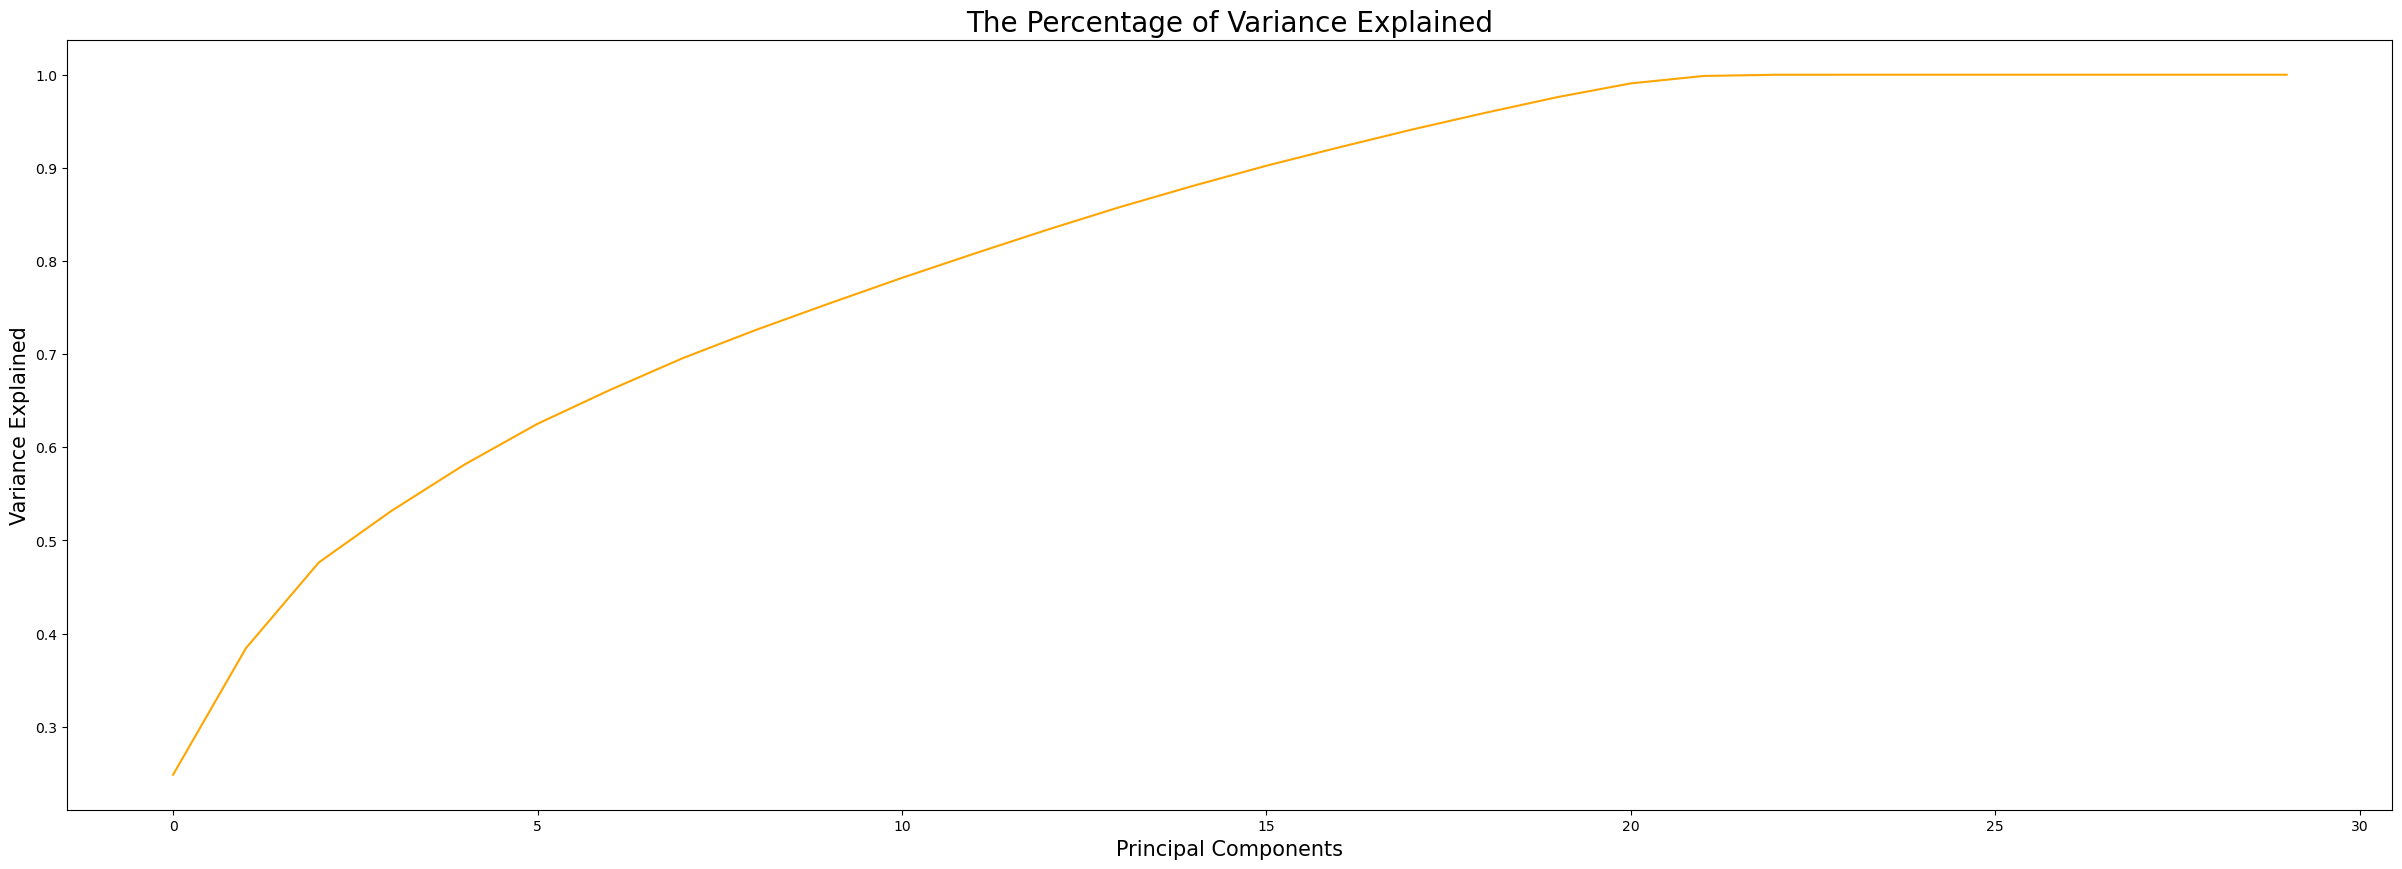

In [33]:
plt.figure(figsize = (30, 10))
sns.lineplot(np.cumsum(pca.explained_variance_ratio_), color = 'orange')
plt.xlabel('Principal Components', fontsize = 15)
plt.ylabel('Variance Explained', fontsize = 15)
plt.title("The Percentage of Variance Explained", fontsize = 20)
#plt.savefig('Plots/Percentage of Variance Explained.png')
plt.show()

In [34]:
y_train.value_counts()

Churn_Yes
0    3628
1    1302
Name: count, dtype: int64

In [35]:
y_cv.value_counts()

Churn_Yes
0    1546
1     567
Name: count, dtype: int64

In [36]:
y_train

2823    0
3908    0
1539    0
2792    0
896     0
       ..
599     0
5695    0
1361    1
1547    1
4959    1
Name: Churn_Yes, Length: 4930, dtype: int32

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
sampler = SMOTE()
X_train_transformed, y_train = sampler.fit_resample(X_train_transformed, y_train)
X_cv_transformed, y_cv = sampler.fit_resample(X_cv_transformed, y_cv)

In [39]:
y_train.value_counts()

Churn_Yes
0    3628
1    3628
Name: count, dtype: int64

In [40]:
y_cv.value_counts()

Churn_Yes
0    1546
1    1546
Name: count, dtype: int64

In [41]:
model = KNeighborsClassifier()
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)

In [42]:
confusion_matrix(y_cv, y_predictions)

array([[1312,  234],
       [ 107, 1439]], dtype=int64)

In [43]:
class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

AUC for our classifier is: 0.9515734801156094


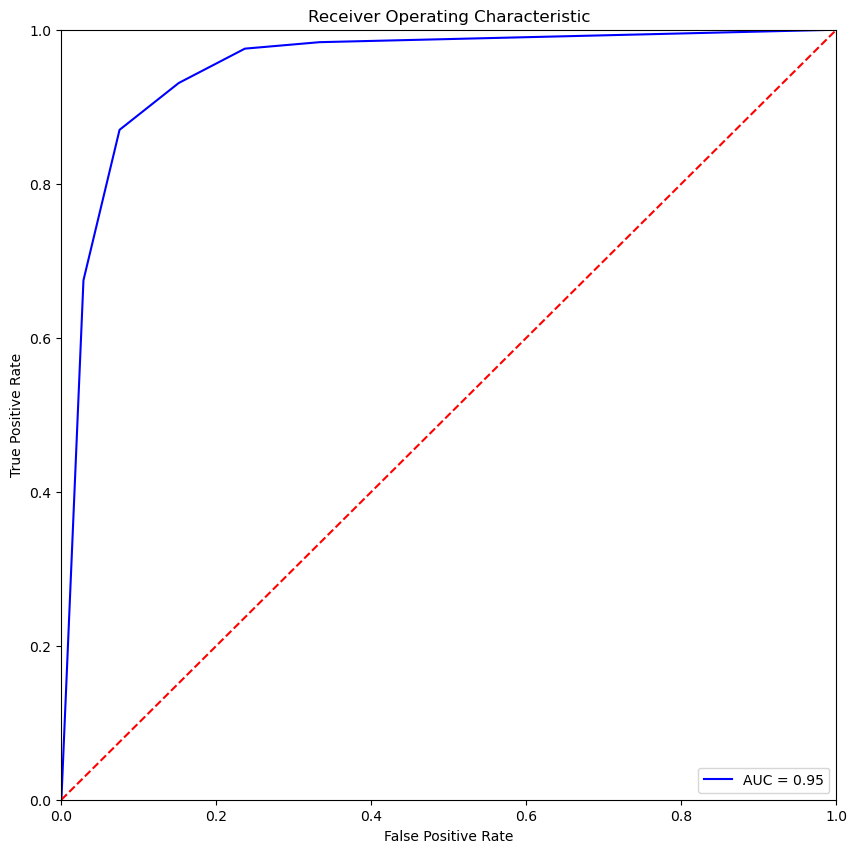

In [44]:
from sklearn.metrics import roc_curve, auc
class_probabilities = model.predict_proba(X_cv_transformed)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig('Machine Learning Plots/KNN AUC Plot.png')
plt.show()

In [45]:
model = SVC(probability = True)
model.fit(X_train_transformed, y_train)
y_predictions = model.predict(X_cv_transformed)